## Imports

In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

from scipy import stats 
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Perceptron

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize

from sklearn.feature_selection import SelectKBest, chi2, RFE

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV, StratifiedShuffleSplit

from sklearn.pipeline import Pipeline

from colorsetup import colors, palette

## Read the data

In [2]:
gcr_data = pd.read_csv("gcr_data_imputed2.csv")
#gcr_data = pd.read_csv("gcr_data_imputed.csv")
#gcr_data = pd.read_csv("gcr_processed.csv")

In [3]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,4.219508,0.693147,2,7.064759,1.945910,0.0000,0.6934,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,1
1,3.135494,0.000000,2,8.691483,3.891820,0.0000,0.6934,0.0,1,0.0,...,0.0,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,0
2,3.912023,0.693147,1,7.648263,2.564949,0.0000,0.6934,0.0,1,0.0,...,0.0,0.0,0,0.0,0.6934,0.0000,0.0000,0.0,0.0,1
3,3.828641,0.693147,2,8.972464,3.761200,0.6934,0.0000,0.0,1,0.0,...,0.0,0.0,0,0.0,0.0000,0.6934,0.0000,0.0,0.0,1
4,3.988984,0.693147,2,8.491055,3.218876,0.6934,0.0000,0.0,1,0.0,...,0.0,0.0,1,0.0,0.0000,0.0000,0.0000,0.0,0.0,0


In [4]:
gcr_data['Credit_amount/duration'] = gcr_data['Credit amount']/gcr_data['Duration']

In [5]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk,Credit_amount/duration
0,4.219508,0.693147,2,7.064759,1.945910,0.0000,0.6934,0.0,0,0.0,...,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,1,3.630568
1,3.135494,0.000000,2,8.691483,3.891820,0.0000,0.6934,0.0,1,0.0,...,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,0,2.233269
2,3.912023,0.693147,1,7.648263,2.564949,0.0000,0.6934,0.0,1,0.0,...,0.0,0,0.0,0.6934,0.0000,0.0000,0.0,0.0,1,2.981838
3,3.828641,0.693147,2,8.972464,3.761200,0.6934,0.0000,0.0,1,0.0,...,0.0,0,0.0,0.0000,0.6934,0.0000,0.0,0.0,1,2.385532
4,3.988984,0.693147,2,8.491055,3.218876,0.6934,0.0000,0.0,1,0.0,...,0.0,1,0.0,0.0000,0.0000,0.0000,0.0,0.0,0,2.637894


In [6]:
#X = gcr_data.drop(['Risk','Credit_amount/duration'], axis=1)
#X = gcr_data.drop(['Risk', 'Credit_amount', 'Duration'], axis=1)
X = gcr_data.drop(['Risk', 'Duration'], axis=1)

y = gcr_data['Risk']

In [7]:
model_fi = ExtraTreesClassifier()
model_fi.fit(X,y)

feat_importances = pd.Series(model_fi.feature_importances_, index=X.columns)

In [8]:
X = gcr_data[feat_importances.nlargest(14).index]

## Models

In [9]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=10, 
                                          test_size=0.30, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, gcr_data.Risk))

# Create the dataframes
X_train = X.loc[train_idx, X.columns]
y_train = gcr_data.loc[train_idx, 'Risk']

X_test  = X.loc[test_idx, X.columns]
y_test  = gcr_data.loc[test_idx, 'Risk']

### Logistic Regression

In [10]:
# L1 regularized logistic regression
lr = LogisticRegression(C=0.7447967465957297, penalty='l2', solver='newton-cg').fit(X_train, y_train)

### Bernoulli Naive Bayes

In [11]:
bern_nb = BernoulliNB(binarize=True)
bern_nb.fit(X_train, y_train)

BernoulliNB(binarize=True)

### Gaussian Naive Bayes

In [12]:
gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

GaussianNB()

### Multinomial Naive Bayes

In [13]:
multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)

MultinomialNB()

### K-Nearest Neighbours

In [14]:
knn_best = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_best = knn_best.fit(X_train, y_train)

### Support Vector Machine

In [15]:
svc = SVC(C=100, gamma=0.01, kernel='rbf', probability=True).fit(X_train, y_train)

### Decision Tree Classifier

In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# hyperparameters
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2), 
              'max_features': range(1, len(dt.feature_importances_)+1)}

dt_gcv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

dt_gcv = dt_gcv.fit(X_train, y_train)

### Random Forest Classifier

In [17]:
rf = RandomForestClassifier(random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

rf.set_params(n_estimators=200)

# Fit the model
rf = rf.fit(X_train, y_train)

### Extra Trees Classifier

In [18]:
et = ExtraTreesClassifier(random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

et.set_params(n_estimators=200)

# Fit the model
et = et.fit(X_train, y_train)

### Gradient Boosting Classifier

In [19]:
tree_list = [15, 25, 50, 100, 200, 400]
# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
gbc = gbc.fit(X_train, y_train)

### Voting Classifier

In [20]:
# The combined model--logistic regression and gradient boosted trees
estimators = [('LR', lr), ('GBC', gbc)]

vc = VotingClassifier(estimators, voting='soft')
vc = vc.fit(X_train, y_train)# The combined model--logistic regression and gradient boosted trees

### AdaBoost Classifier

In [21]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.01)
abc.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=200)

### XGBoost Classifier

In [22]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Metrics and Confusion Matrix

#### Suppressing any warnings

In [23]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [24]:
###################################################################################
###   Coefficients

labels = ['lr', 'bern_nb','gauss_nb', 'multi_nb', 'knn', 'svc', 'dt', 'rf', 'et', 'gbc', 'abc', 'vc', 'xgbc']
models = [lr, bern_nb, gauss_nb, multi_nb, knn_best, svc,  dt, rf, et, gbc, abc, vc, xgbc]

######################################################################################
###   Predictions

y_pred = list()
y_prob = list()

for lab,mod in zip(labels, models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

#y_pred.head()

######################################################################################
### Metrics

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    #tn, fp, fn, tp = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

metrics

,lr,bern_nb,gauss_nb,multi_nb,knn,svc,dt,rf,et,gbc,abc,vc,xgbc
precision,0.725254,0.490000,0.705921,0.490000,0.723751,0.712314,0.675418,0.729498,0.722831,0.730009,0.796622,0.746341,0.706667
recall,0.743333,0.700000,0.720000,0.700000,0.733333,0.733333,0.673333,0.746667,0.730000,0.746667,0.713333,0.760000,0.726667
fscore,0.720518,0.576471,0.710198,0.576471,0.677401,0.708715,0.674347,0.723279,0.725727,0.728247,0.606560,0.739474,0.708444
accuracy,0.743333,0.700000,0.720000,0.700000,0.733333,0.733333,0.673333,0.746667,0.730000,0.746667,0.713333,0.760000,0.726667
auc,0.635714,0.500000,0.638095,0.500000,0.580952,0.622222,0.614286,0.638095,0.664286,0.647619,0.522222,0.657143,0.626984


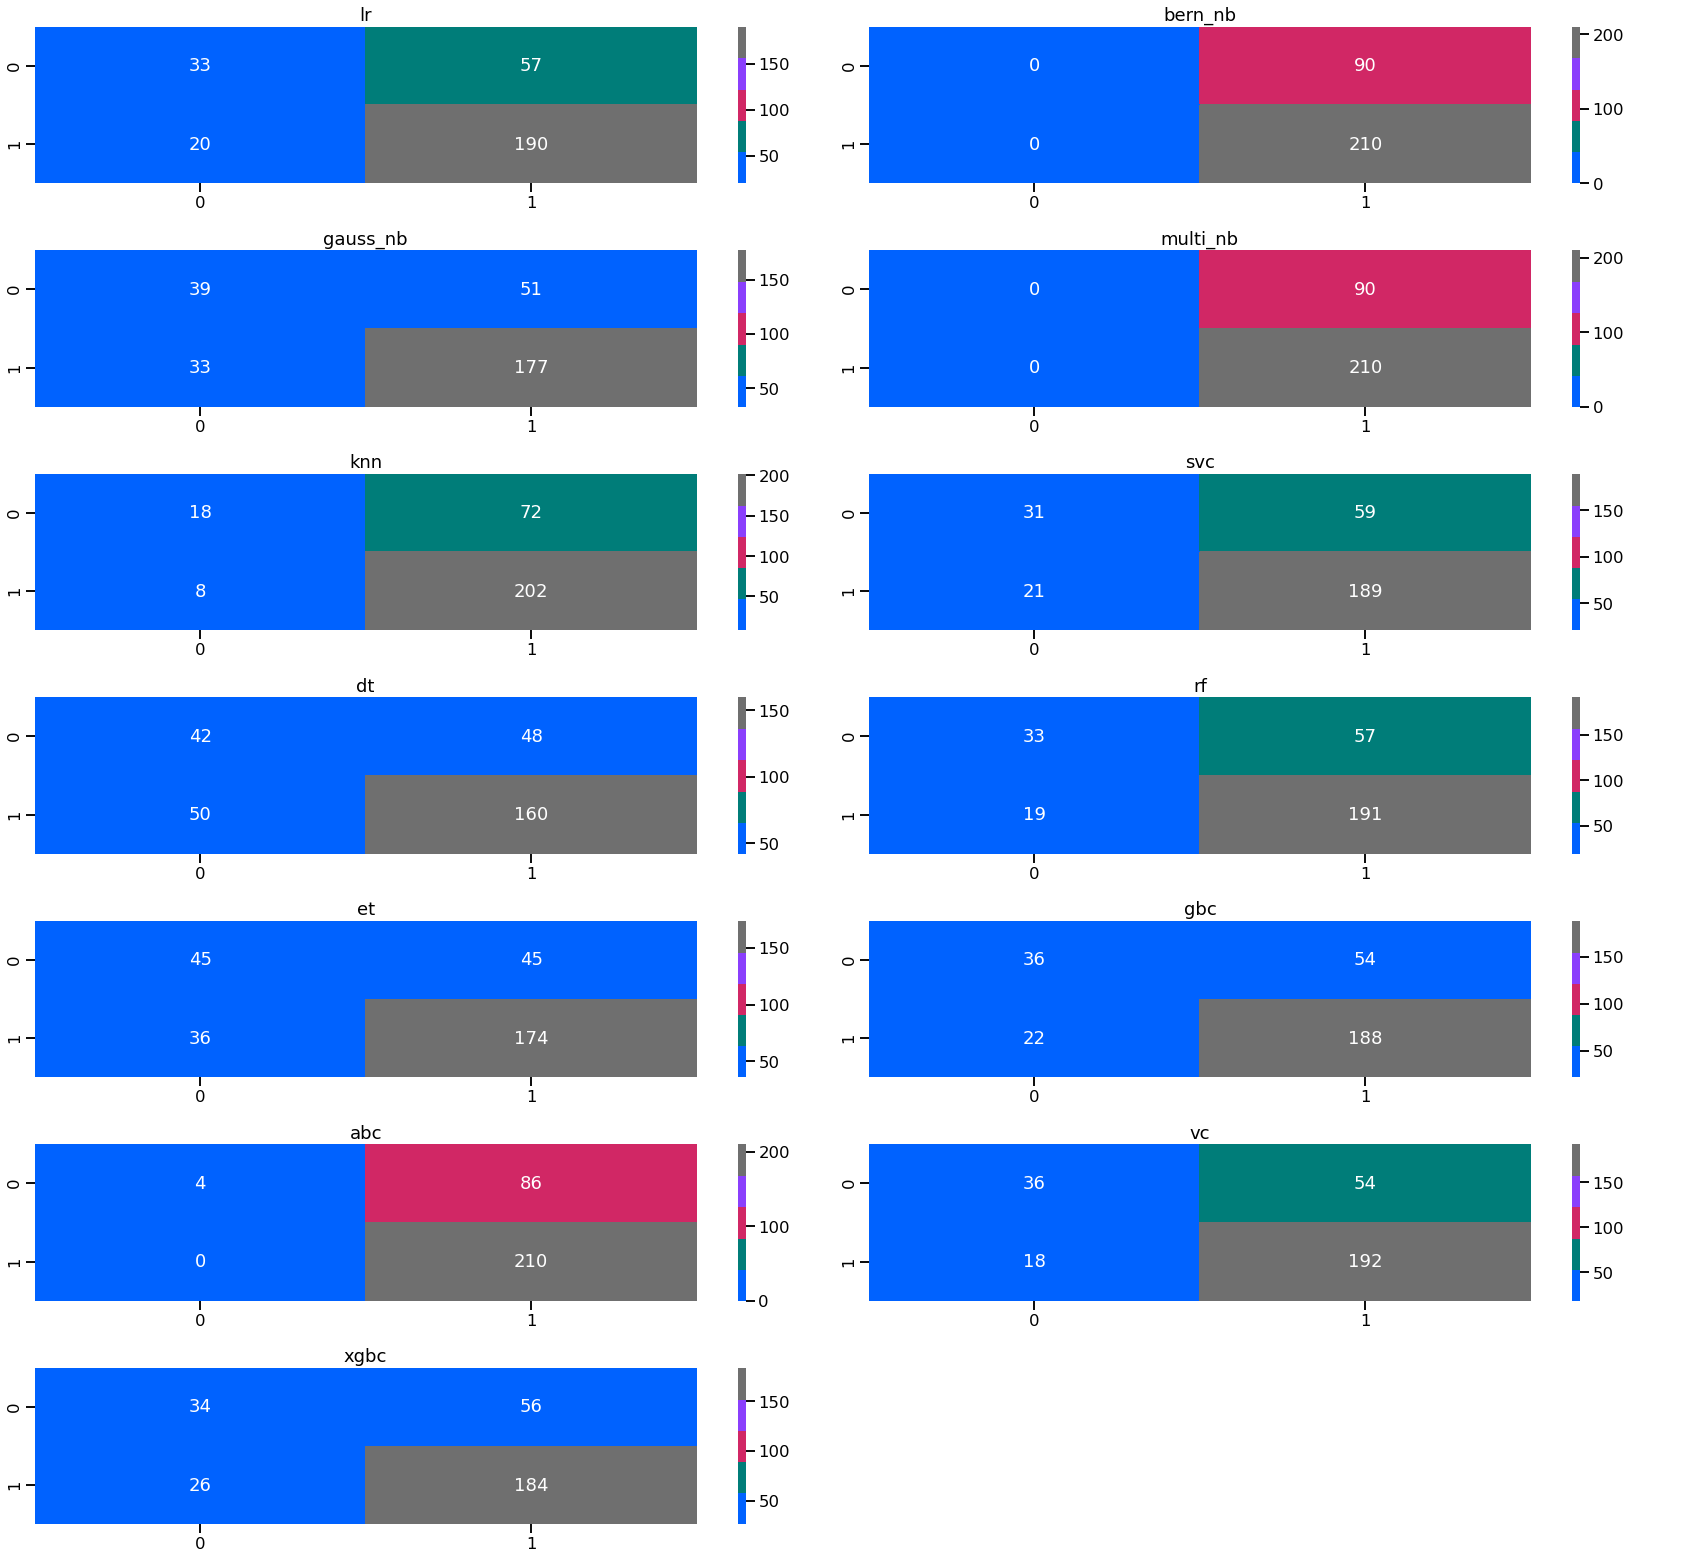

In [25]:
sns.set_context('talk')

fig, axList = plt.subplots(nrows=7, ncols=2)
axList = axList.flatten()
fig.set_size_inches(24, 22)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()